## `Follow along in this notebook to see the creation process of Figure 1: Species Diversity`

### `We will first import any packages needed`

In [11]:
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt

### `We can now load in and preview the data`

In [12]:
cfh = 'F:\\Research\\Funded\\UIREEJ\\Data\\Catch.pkl'
catch = pd.read_pickle(cfh)
# catch[['Fish', 'Site', '_Site', '_Species']].head(15)

### `Simplify `

In [13]:
catch['_Species'].replace("Common carp", "Carp", inplace=True) 
catch['_Species'].replace("Mirror Carp", "Carp", inplace=True)

### `Seperate up and down Stream`

In [14]:
down = catch.loc[catch['Site'].isin([1.0,3.0])]
down_df = down.groupby(down.loc[:,'_Species']).size()
down_df.name = 'down'
up = catch.loc[catch['Site'].isin([2.0,4.0])]
up_df = up.groupby(up.loc[:,'_Species']).size()
up_df.name = 'up'

### `Combine`

In [15]:
metadata = pd.merge(down_df, up_df, how='outer', left_index=True, right_index=True)
# metadata

### `Add Niches`

In [16]:
niche_dict = {
    "Bigmouth Buffalo"    : "C",
    "Black bullhead"      : "A",
    "Black crappie"       : "A",
    "Bluegill"            : "A",
    "Bowfin"              : "D",
    "Brown bullhead"      : "A",
    "Carp"                : "A",
    "Channel catfish"     : "C",
    "Common Shinner"      : "A",
    "Emmerald Shinner"    : "D",
    "Freshwater drum"     : "A",
    "Gizzard shad"        : "D",
    "Goldfish"            : "A",
    "Green sunfish"       : "A",
    "Largemouth bass"     : "C",
    "Longnose Gar"        : "A",
    "Northern Logperch"   : "A",
    "Northern Pike"       : "A",
    "Pumpkinseed sunfish" : "D",
    "Quillback"           : "A",
    "Redhorse"            : "A",
    "Rock bass"           : "B",
    "Round goby"          : "B",
    "Smallmouth bass"     : "C",
    "Unknown"             : "B",
    "Walleye"             : "B",
    "Warmouth"            : "B",
    "White Crappie"       : "D",
    "White Perch"         : "B",
    "White bass"          : "B",
    "White sucker"        : "D",
    "Yellow Bullhead"     : "B",
    "Yellow perch"        : "C",
}

metadata['Feeding'] = [niche_dict[x] for x in metadata.index]

color_dict = {
    "A" : "red",
    "B" : "gold",
    "C" : "blue",
    "D" : "purple",
}

metadata['Color'] = metadata['Feeding'].apply(lambda x: color_dict[x])

metadata.drop("Unknown", inplace=True)

# metadata

### `Plot Formatting`

In [17]:
matplotlib.rcParams['font.family'] = 'consolas'
matplotlib.rcParams['axes.titlecolor'] = 'black'
matplotlib.rcParams['axes.titlesize'] = 39
matplotlib.rcParams['axes.titlepad'] = 15
matplotlib.rcParams['axes.labelcolor'] = 'black'
matplotlib.rcParams['axes.labelsize'] = 26
matplotlib.rcParams['axes.labelpad'] = 25
matplotlib.rcParams['axes.xmargin'] = .75
matplotlib.rcParams['axes.ymargin'] = .025
matplotlib.rcParams['axes.edgecolor'] = 'black'
matplotlib.rcParams['axes.formatter.use_mathtext'] = True
matplotlib.rcParams['xtick.labelsize'] = 20
matplotlib.rcParams['ytick.labelsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20
matplotlib.rcParams['legend.fontsize'] = 20
matplotlib.rcParams['legend.labelspacing'] = 1
matplotlib.rcParams['legend.framealpha'] = 0
matplotlib.rcParams['text.usetex'] = True

### `Plot`

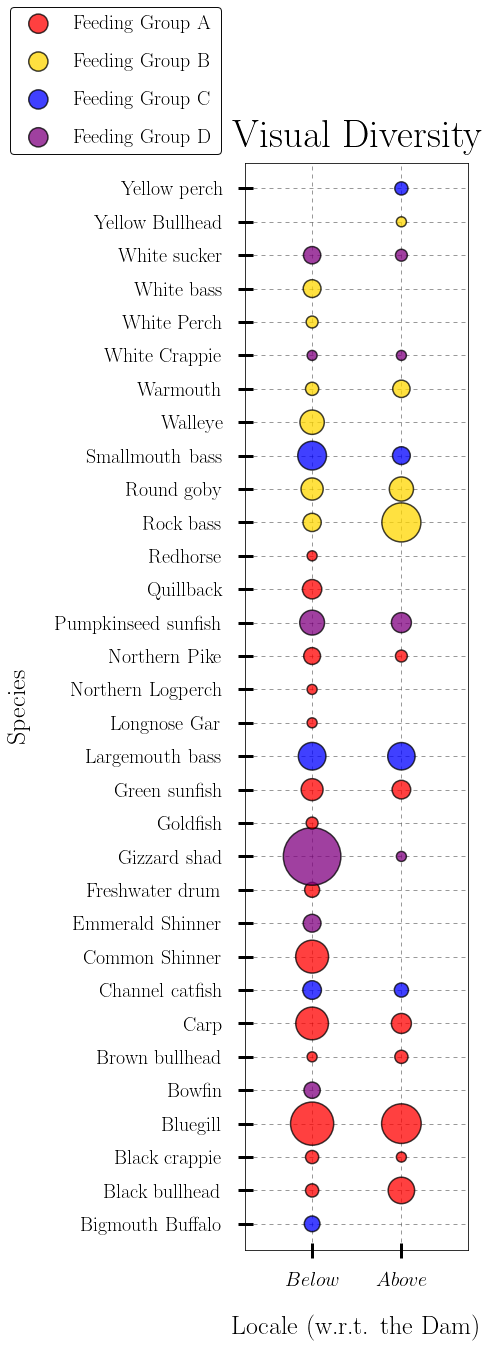

In [18]:
plt.tick_params(direction='inout',axis='both', pad=15, width=3, length=15, color='black')
plt.grid(dashes=[5, 5], animated=True, alpha=.5, c='black', zorder=3)
plt.xticks(rotation=0, ha='center')
plt.title(r'Visual Diversity', style='oblique')
plt.xlabel(r'Locale (w.r.t. the Dam)', style='italic')
plt.ylabel(r'Species', style='italic')


# Bubble Scales
import math
metadata.down = 100*metadata.down.apply(lambda x: math.sqrt(x))
metadata.up = 100*metadata.up.apply(lambda x: math.sqrt(x))

# X 
metadata['Above'] = r'$Above$'
metadata['Below'] = r'$Below$'

# PLOT
plt.scatter(metadata['Below'], metadata.index, s=metadata.down, alpha=.75, c=metadata['Color'], marker='o',edgecolor='black', linewidth=1.5, zorder=2)

up_mask = metadata["up"] > 0

mask1 = metadata["Feeding"] == "A"
plt.scatter(metadata['Above'][up_mask & mask1], metadata.index[up_mask & mask1], s=metadata.up[up_mask & mask1], alpha=.75, c=metadata['Color'][up_mask & mask1], label="Feeding Group A", marker='o', edgecolor='black', linewidth=1.5, zorder=2)
mask2 = metadata["Feeding"] == "B"
plt.scatter(metadata['Above'][up_mask & mask2], metadata.index[up_mask & mask2], s=metadata.up[up_mask & mask2], alpha=.75, c=metadata['Color'][up_mask & mask2], label="Feeding Group B", marker='o', edgecolor='black', linewidth=1.5, zorder=2)
mask3 = metadata["Feeding"] == "C"
plt.scatter(metadata['Above'][up_mask & mask3], metadata.index[up_mask & mask3], s=metadata.up[up_mask & mask3], alpha=.75, c=metadata['Color'][up_mask & mask3], label="Feeding Group C", marker='o', edgecolor='black', linewidth=1.5, zorder=2)
mask4 = metadata["Feeding"] == "D"
plt.scatter(metadata['Above'][up_mask & mask4], metadata.index[up_mask & mask4], s=metadata.up[up_mask & mask4], alpha=.75, c=metadata['Color'][up_mask & mask4], label="Feeding Group D", marker='o', edgecolor='black', linewidth=1.5, zorder=2)

# SCALE
fig = plt.gcf()
fig.set_size_inches(4, 20)

# LEGEND
legend = fig.legend(loc=2, frameon=True, edgecolor="black", fancybox=True, framealpha=0.95, bbox_to_anchor=(-0.725, 0.995))
for legend_handle in legend.legendHandles:
    legend_handle.set_sizes([369,369,369,369])
# SHOW
plt.show()